# P04: The Regression Pipeline: Preprocessing
This practical is best done only after you have gone through *L03:The Regression Pipeline*.

1. [Data Collection and Exploration](#1.0-Data-Collection-and-Exploration)
   1. [Load the dataset](#1.1-Load-the-dataset)
   2. [Explore the dataset](#1.2-Explore-the-dataset)
2. [Data Preprocessing](#2.0-Data-Preprocessing)
   1. [Split the dataset into training and testing set](#2.1-Split-the-dataset-into-training-and-testing-set)
   2. [Handling missing values](#2.2-Handling-missing-values)
   3. [Preprocessing numerical data: Standardization](#2.3-Preprocessing-numerical-data:-Standardization)
   4. [Preprocessing categorical Data: One-hot encoding](#2.4-Preprocessing-categorical-Data:-One-hot-encoding)
   5. [Finalizing the training set](#2.5-Finalizing-the-training-set)
3. Select and Train a Model (P05)
4. Evaluate system on unseen data (P05)


In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## 1.0 Data Collection and Exploration

### 1.1 Load the dataset

First, we load the dataset. 

**Exercise 1.** Load the dataset into a variable called `housing` (Hint: use [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), click on the hyperlink to learn how to use). The dataset is the csv file `housing.csv` located at the same directory as the notebook file. 

In [2]:
# write code to load dataset into variable housing
housing = pd.read_csv("housing.csv")

### 1.2 Explore the dataset

#### General understanding of the dataset

**Exercise 2.** Write the code to peek at the first five items of the DataFrame `housing` (Hint: use [*DataFrame*.head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html), click on the hyperlink to learn how to use).  

In [3]:
# write code to show first 5 items of DataFrame housing
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Then, go through the five items and identify the following items:

1. How many numerical attributes and categorical attributes are there in the dataset? 

2. There are a total of 10 columns in the dataset where 9 columns are input features and 1 column is the targeted variable. 
   1. The targeted variable is the median house value. What is the name of the column representing the targeted variable? 
  
   2. What are the two input features (columns) that tell us about the exact location of a district?

   3. What is the input feature that allows us to know if a district is near to the sea?

   4. What are the two input features that describe the number of rooms in a district? 

   5. What is the input feature concerning the wealth of the people living in a district?
 
   6. What are the two input features that tell us how many people or families there are in a district?

**Exercise 3.** Write the code to get a quick description all attributes in the DataFrame `housing` (Hint: use [*DataFrame*.info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html), click on the hyperlink to learn how to use). 

In [4]:
housing.info()
# write code to show a quick description all attributes in housing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Go through the descriptions for all attributes and answer the following questions:

1. How many samples are in the dataset?

2. How much memory is required to load the dataset? 

3. Show that the attribute `total_bedrooms` has a total of 207 missing values.

4. How many numerical and non-numerical attributes (columns) are there in the dataset? <br>Notes: A column is considered as numerical only if all values in the column are numerical values. All non-numerical columns are defined as type `object`, which encompasses all data types.

#### Analyze the numerical attributes

**Exercise 4.** Write the code to show the statistics of all numerical attributes in the DataFrame `housing` (Hint: use [*DataFrame*.describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html), click on the hyperlink to learn how to use). 

In [5]:
# write code to show the statistics of all numerical attributes in housing
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Go through the statistical information of the attributes and answer the following questions: 
1. What is the *input feature* (excluding `median_house_value`) with the smallest magnitude of mean value? 

2. What is the *input feature* (excluding `median_house_value`) with the largest magnitude of mean value? 

3. What is the *input feature* (excluding `median_house_value`) with the smallest standard deviation?

4. What is the *input feature* (excluding `median_house_value`) with the largest standard deviation?


**Observations:**
* The range of scales of the features are quite different. This highlights the need for *feature scaling* to be performed on the data set. 

**Exercise 5.** Write the code to plot the histogram of each numerical attribute (Hint: use [*DataFrame*.hist](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html), click on the hyperlink to learn how to use). Set the number of bins to 50 and figure size to (20, 15).



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

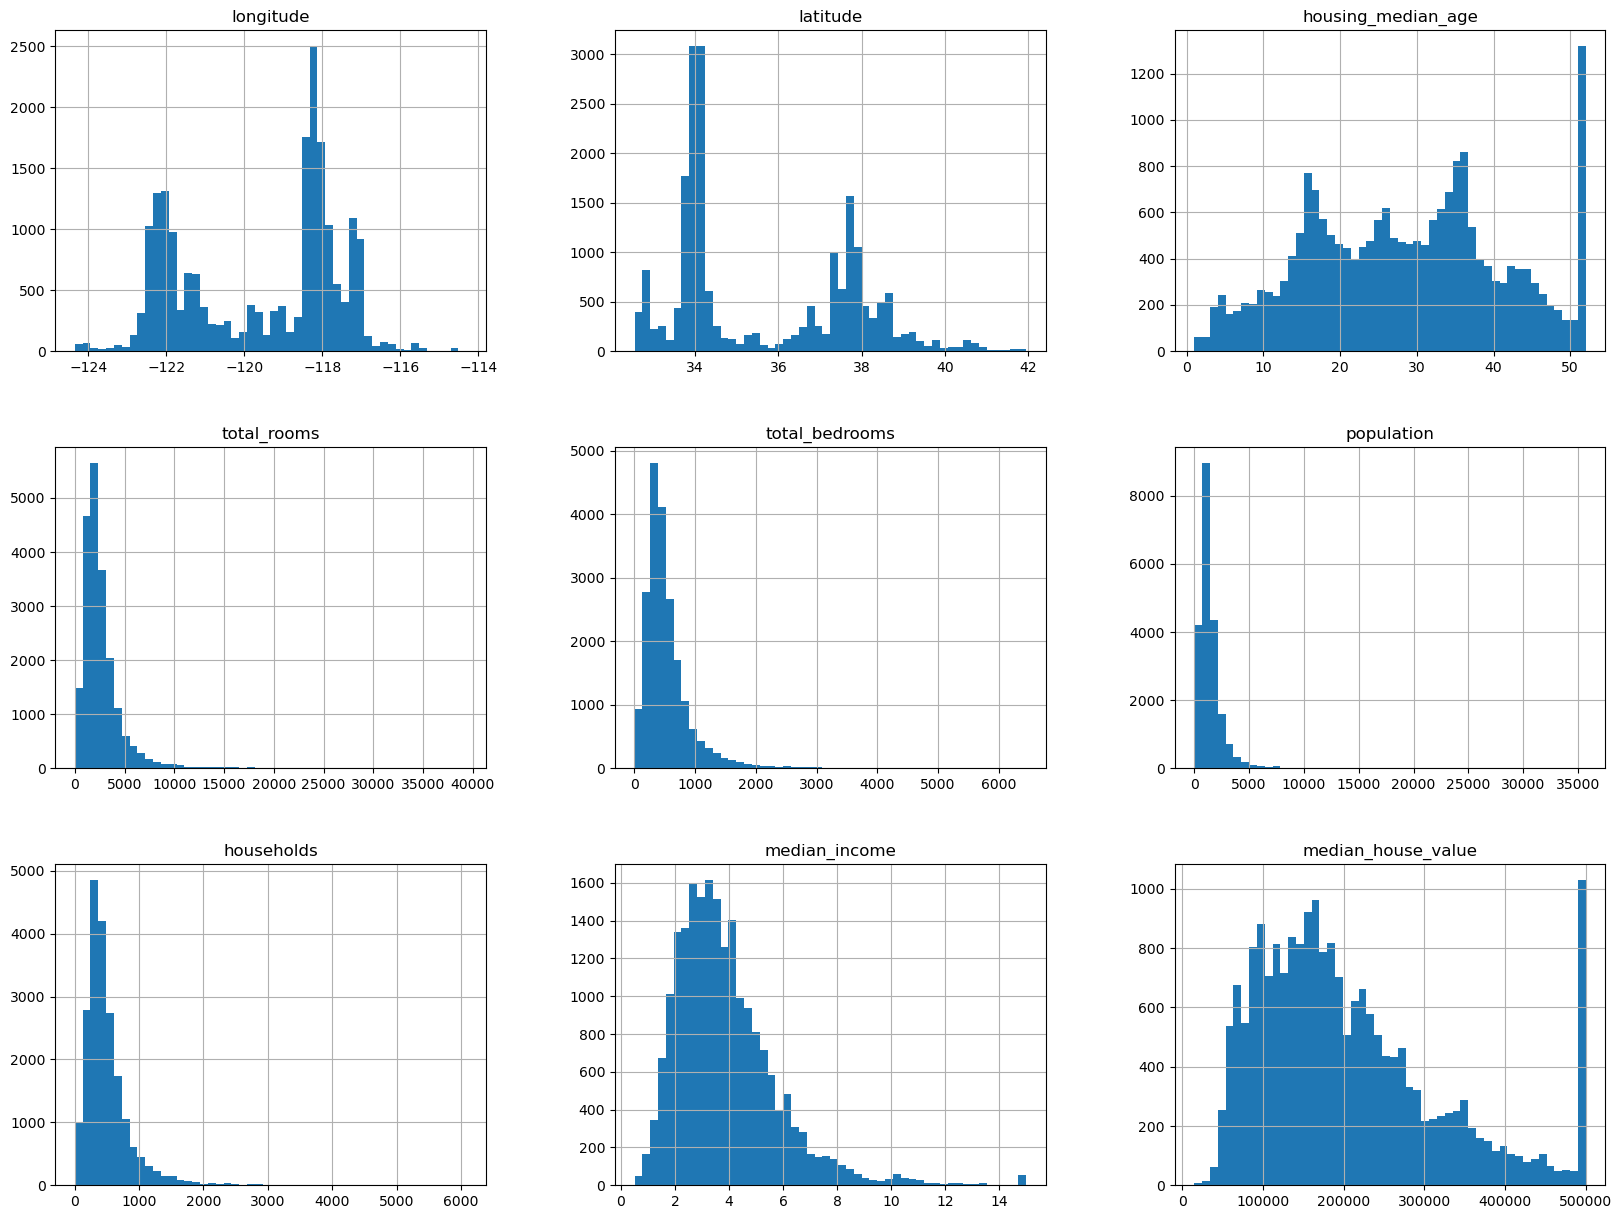

In [10]:
# write code to plot the histogram of each numerical attribute
housing.hist(bins=50, figsize=(20,15))

Referring to the histograms generated, answer the following questions:

1. Which 5 attributes have the heavy tail issue?

2. Observe the two attributes *housing_median_age* and *median_house_value*. What is peculiar about these two histograms? What may be the cause?

3. Identify two input features with very different scales.


**Exercise 6.** From Exercise 5, we know that the last bin for *housing_median_age* and *median_house_value* are abnormally high because their values are capped at a maximum value. Find the values where both attributes are capped.

Ans: 
```
housing_median_age is capped at value 52.0
median_house_value is capped at value 500001.0
```

In [12]:
# Your code here (2 lines)
print(housing.housing_median_age.max())
print(housing.median_house_value.max())

52.0
500001.0


**Distribution is skewed, symmetric, and if there are any outliers**

If you want to plot the line within the histogram to see whether the data distribution is skewed, symmetric and if there are any outlier, you can use Seaborn library.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

For more information
https://seaborn.pydata.org/

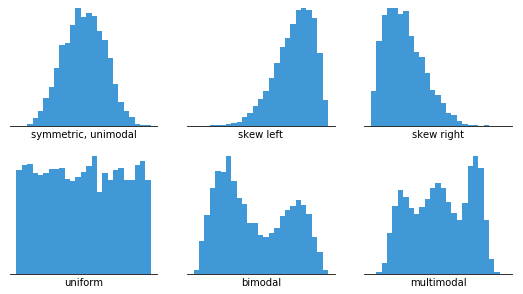

In [13]:
#Import Seaborn library
import seaborn as sns 

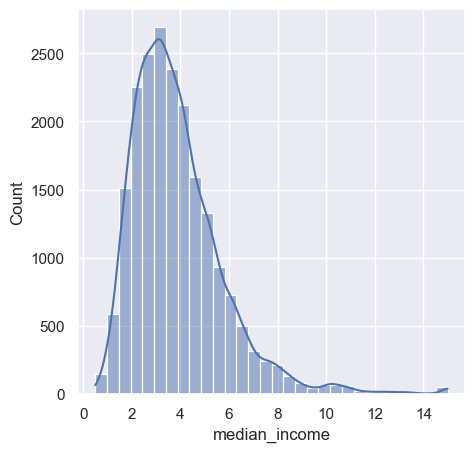

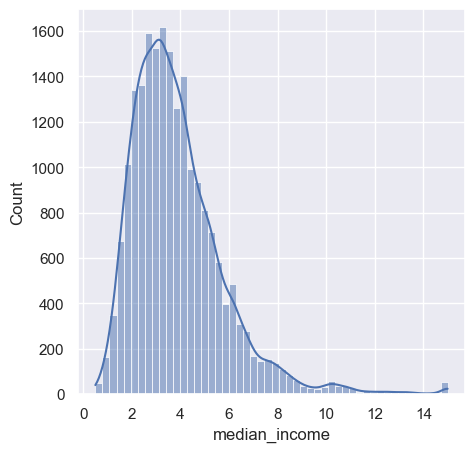

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
sns.histplot(housing['median_income'], bins=30, kde=True)
plt.show()

sns.histplot(housing['median_income'], bins=50, kde=True)
plt.show()

**Analyzing categorical data**

**Exercise 7.** There is one categorical feature in our dataset. Identify the possible values (categories) for this feature (Hint: use [*Series*.value_counts](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html), click on the hyperlink to learn how to use).


In [16]:
# write code to identify the possible values (categories) for 'ocean_proximity'
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

1. How many possible values are there for the categorical feature?
2. What is the most frequent value? 
3. What is the least  frequent value? 

---
## 2.0 Data Preprocessing

### 2.1 Split the dataset into training and testing set

#### Separate *output* vector from the *input* matrix

Before we split the training and testing set, let's separate the *output* (y) from *input* (**X**). For this dataset, y is the `median_house_value` column.

**Exercise 8.** Separate the *output* vector from the *input* matrix. 
1. To create the *input matrix* `X`, simply drop the `median_house_value` column from `housing`. 
2. The *output vector* `y` can be created by select the `median_house_value` column in `housing`. 


In [17]:
# write code to separate the output (y) from input (X)
X = housing.drop('median_house_value', axis=1)
y = housing.median_house_value

**Exercise 9.** Show the shapes and types of `X` and `y`.

In [19]:
# Your code here
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


#### Split the dataset into training and testing set
Our next task is to use **Random Sampling** to split the dataset into training and testing set.
<br><br>
**Exercise 10.** Split the dataset into the training set `'train`' and testing set `'test`' using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) (click hyperlink to learn how to use)

* `X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size=0.2, random_state=30)` 
  * `X_train`, `y_train` X and y of train set
  * `X_test`, `y_test` X and y of test set 
  * `test_size`: The proportion of the dataset to include in the test split. When set to 0.2, this means 80% for training and 20% for testing. 
  * `random_state = 30`: Seeds the random generator so that we will get the same split each time we run the program.

In [20]:
# Your code here
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size=0.2, random_state=30)

In [21]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(20640, 9)
(16512, 9)
(4128, 9)
(20640,)
(16512,)
(4128,)


#### Split the input matrix into numerical and categorical sets

The required data preprocessing differs for numerical and categorical features. Therefore, we need to split the *input matrix* into two sets, one with numerical features only and the other with categorical features only.  

**Exercise 11.** Further split the input matrix into two: 
1. `X_train_num` contains only numerical attributes (`longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`). This is a `DataFrame` object. 
2. `X_train_cat` contains only categorical attributes (namely `ocean_proximity`). This is a `Series` object.

Ans:
```
X_train_num shape: (16512, 8)
X_train_cat shape: (16512,)
```

In [22]:
# Your code here (2 lines)
X_train_num = X_train.drop('ocean_proximity', axis=1)
X_train_cat = X_train['ocean_proximity']

In [23]:
print('X_train_num shape:', X_train_num.shape)
print('X_train_cat shape:', X_train_cat.shape)

X_train_num shape: (16512, 8)
X_train_cat shape: (16512,)


### 2.2 Handling missing values 

Then, it's time to perform cleaning. From the previous exploratory process, we know that `total_bedroom` has missing values. Type the code to show the number of missing values in each column.

In [25]:
print('Number of missing values for all columns:')
# Your code here
X_train_num.isnull().sum()

Number of missing values for all columns:


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        162
population              0
households              0
median_income           0
dtype: int64

In [27]:
X_train_cat.isnull().sum()

0

**Exercise 12.** Fill up the missing values (or Imput) with the median value for each column. Use the Scikit-Learn library: [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) (click on hyperlink to learn how to use). It commences in three steps:
1. Create the imputer object `imputer`. Set the median as the selected strategy (`strategy = 'median'`).  
2. Fit the *training* set `X_train_num` using the fit command (`imputer.fit`). This will compute the median for all columns.
3. Fill the missing values in `X_train_num` using the transform command (`imputer.transform`). Save your result as `X_train_num_tr`.

In [29]:
# Your code here (4 lines)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train_num)    #Check missing value columns and compute their median values
X_train_num_tr = imputer.transform(X_train_num)

**Exercise 13**. Although Scikit-Learn library accepts both numpy arrays and pandas dataFrames as input, they typically returns a numpy array as output. Verify that the input (`X_train_num`) is a panda DataFrame while the output (`X_train_num_tr`) is numpy array. 

Ans:
```
Type of X_train_num: <class 'pandas.core.frame.DataFrame'>
Type of X_train_num_tr: <class 'numpy.ndarray'>
```

In [31]:
# Your code here
print('Type of X_train_num: ', type(X_train_num))
print('Type of X_train_num_tr: ', type(X_train_num_tr))

Type of X_train_num:  <class 'pandas.core.frame.DataFrame'>
Type of X_train_num_tr:  <class 'numpy.ndarray'>


The following code shows that there is no more missing values in `total_bedrooms` through the code below.

In [32]:
print('Number of missing values for all columns:')
X_train_num_tr_pd = pd.DataFrame(X_train_num_tr, columns = X_train_num.columns)
X_train_num_tr_pd.isnull().sum()

Number of missing values for all columns:


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### 2.3 Preprocessing numerical data: Standardization

As observed earlier, the features in our input matrix have different scales. Some machine learning algorithm cannot handle features with varying scales very well. Therefore, we perform *standardization* on the features so that all the features have a mean of 0 and a standard deviation of 1. The standardization formula is given  as follows: 

$x'= \frac{x - \bar{x}}{\sigma}$

where $x'$ is the standardized feature, $x$ is the original feature vector, $\bar{x}$ is the mean of that feature vector, and $\sigma$  is its standard deviation.

**Exercise 14.** Standardize the features by using the Scikit-Learn library [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (click on hyperlink to learn how to use). It commences in three steps:
1. Create the scaler object called `scaler`.
2. Fit the *training* set `X_train_num_tr` using the fit command (`scaler.fit`). This will compute the mean ($\bar{x}$) and stand deviation ($\sigma$) for all columns.
3. Standardize a *targeted* dataset using the transform command (`scaler.transform`). Save the scaled data with the same name `X_train_num_tr`

**Caution**: Do not run the above code twice to avoid using a wrong mean and standard value to scale your test set.

In [33]:
# Your code here (4 lines)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num_tr) #Compute mean and std for all columns
X_train_num_tr = scaler.transform(X_train_num_tr)



If your implementation above is correct, the mean and standard deviation of `X_train_num_tr` are approximately 0 and 1, respectively. 

In [34]:
print('>>> Mean of all columns:\n', X_train_num_tr.mean(axis=0))
print('\n>>> Std of all columns:\n', X_train_num_tr.std(axis=0))

>>> Mean of all columns:
 [ 1.62606793e-15  4.16850017e-15  1.24577351e-16 -6.97654682e-17
 -3.99658773e-17 -5.08583270e-17  7.27239113e-17  5.24989182e-17]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1.]


### 2.4 Preprocessing categorical Data: One-hot encoding

Most machine learning can only handle numerical inputs. There is only one categorical feature in our dataset, namely `ocean_proximity` which we have extracted and stored in `X_train_cat`. `ocean_proximity` is a nominal data type since it has no order information. Therefore, the feature will be encoded using **one-hot encoding**.

**Exercise 15.** Encode the categorical feature into its one-hot representation using the Scikit-Learn library [LabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) (click on hyperlink to learn how to use). It commences in three steps:
1. Create the LabelBinarizer object called `lb_encoder`.
2. Fit the training set `X_train_cat` using the fit command (`lb_encoder.fit`). This will compute the possible values of the categorical feature in `X_train_cat`
3. Standardize a targeted dataset using the transform command (`lb_encoder.transform`). Save the transformed feature as `X_train_cat_tr`.

In [35]:
# Your code here (4 lines)
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
lb_encoder.fit(X_train_cat)
X_train_cat_tr = lb_encoder.transform(X_train_cat)

If your implementation is correct, then the following code will show that `X_train_cat_tr` is a *binary vector* of size (16512, 5). Each of the five columns corresponds to one possible value of the categorical feature `ocean_proximity`.

In [37]:
print('Shape of X_train_cat_tr:', X_train_cat_tr.shape, '\n')
print(X_train_cat_tr, '\n')


Shape of X_train_cat_tr: (16512, 5) 

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]] 



You can list the possible values for the transformed feature through `lb_encoder.classes_`. The five possible values of `ocean_proximity` are `['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']`.

In [38]:
print('Possible values of ocean_proximity:\n', lb_encoder.classes_)

Possible values of ocean_proximity:
 ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


### 2.5 Finalizing the training set

**Exercise 16.** After cleaning and transforming our data, we can now finalize our dataset. First, we combine the transformed numerical and categorical sets `X_train_num_tr` and `X_train_cat_tr` into `X_train_tr`. Also, we convert `y_train` to numpy array format for subsequence model training process.

Our finalized training set are:
1. `X_train_tr` with shape (16512, 13)
2. `y_train` with shape (16512,)

In [42]:
# 1. Combine numerical and categorical sets. Your code here (1 line)
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])

# 2. Convert y_train to numpy array. Your code here (1 line)
y_train = y_train.values;

print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)

X_train_tr shape: (16512, 13)
y_train shape: (16512,)


### .........To be continued in P05